## House Price Prediction - End-to-End Project

### Dataset from Kaggle
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

### Steps to follow in this project

1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployment


##### Import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


## 1. Data Analysis

The main aim here is to explore the data and gain a better understanding of its characteristics and patterns

In [22]:
# Setting display option for pandas

pd.pandas.set_option('display.max_columns',None)
#pd.set_option('display.max_rows', None)
#pd.reset_option('display.max_rows')

In [285]:
# Reading train data set

dataset=pd.read_csv('train.csv')

dataset_test=pd.read_csv('test.csv')

In [228]:
dataset_1=pd.read_csv('train.csv')

In [13]:
dataset.shape

(1460, 81)

In [23]:
dataset.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Steps In Data Analysis

- Missing Values 
- Numerical Variables 
- Distribution of the Numerical Variables 
- Categorical Variables 
- Cardinality of Categorical Variables 
- Outliers 
- Relationship between Independent and Dependent Features (SalePrice)


##### 1.1 Missing Values

In [62]:
# making a list of features which has missing values
features_with_na = [features for features in dataset.columns if dataset[features].isnull().sum()>1]

# calculating missing value percentage
missing_value_percentages = [
    (feature, np.round(dataset[feature].isnull().mean() * 100, 2))
    for feature in features_with_na
]

# Sort by the percentage of missing values in descending order
missing_value_percentages.sort(key=lambda x: x[1], reverse=True)

# Print the features and their corresponding missing value percentages
for feature, percentage in missing_value_percentages:
    print(feature, 'has', percentage, '% missing values')

PoolQC has 99.52 % missing values
MiscFeature has 96.3 % missing values
Alley has 93.77 % missing values
Fence has 80.75 % missing values
FireplaceQu has 47.26 % missing values
LotFrontage has 17.74 % missing values
GarageType has 5.55 % missing values
GarageYrBlt has 5.55 % missing values
GarageFinish has 5.55 % missing values
GarageQual has 5.55 % missing values
GarageCond has 5.55 % missing values
BsmtExposure has 2.6 % missing values
BsmtFinType2 has 2.6 % missing values
BsmtQual has 2.53 % missing values
BsmtCond has 2.53 % missing values
BsmtFinType1 has 2.53 % missing values
MasVnrType has 0.55 % missing values
MasVnrArea has 0.55 % missing values


**Finding relationship between missing values and sales price**

In [ ]:
# Plot the bar chart for each feature along with its missing value percentage
for feature, percentage in missing_value_percentages:
    data = dataset.copy()
    
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(f"{feature} - {percentage}% missing values")
    plt.show()
    

Here, the relationship between the missing values and the dependent variable is clearly visible. Therefore, we need to replace these NaN values with something meaningful, which will be addressed in a later section.

##### 1.2 Numerical Variables

Listing all numerical features

In [79]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtype != 'O']

print('Number of numerical variables: ', len(numerical_features))

dataset[numerical_features].head(5)

Number of numerical variables:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


Temporal Variables(eg. Datetime Variables)

From the dataset, we have four year features. We need to extract information from these datetime variables, such as the number of years or days. One example in this specific scenario can be calculating the difference in years between the year the house was built and the year the house was sold.

In [80]:
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [81]:
# content of these year features
for feature in year_feature:
    print(feature, dataset[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

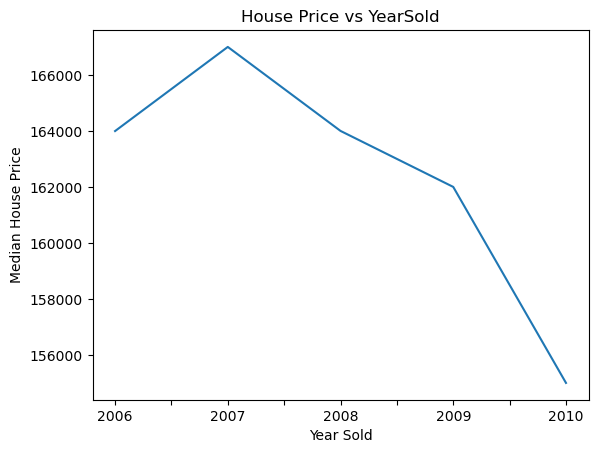

In [83]:
# Analyzing Temporal Datetime Features
# checking for relation between year the house sold and the sales price

data = dataset.copy()

# Convert 'YrSold' column to categorical data type
data['YrSold'] = data['YrSold'].astype('category')

# Create the plot
data.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")
plt.show()

Here, it can be observed that house prices are decreasing as the years increase.

In [ ]:
## comparison between the difference between all years feature with sale price

def plot_year_feature_vs_saleprice(feature, dataset):
    if feature != 'YrSold':
        data = dataset.copy()
        data[feature] = data['YrSold'] - data[feature]

        plt.scatter(data[feature], data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

# Plot the difference between each year feature and the year the house was sold
for feature in year_feature:
    plot_year_feature_vs_saleprice(feature, dataset)

In [89]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 17


In [90]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [93]:
dataset[discrete_feature]

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,6,5,0,0,0,2,1,3,1,7,1,2,0,0,0,8
1456,20,6,6,0,1,0,2,0,3,1,7,2,2,0,0,0,2
1457,70,7,9,0,0,0,2,0,4,1,9,2,1,0,0,2500,5
1458,20,5,6,0,1,0,1,0,2,1,5,0,1,0,0,0,4


In [ ]:
## realtionship between discrete features and sales price

for feature in discrete_feature:
    data=dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot(kind='bar', colormap='viridis')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

#### Continuous Variable

In [97]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 16


In [ ]:


def plot_histogram(feature, dataset, bins=25):
    data = dataset.copy()
    data[feature].hist(bins=bins)
    
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()


# Create histograms for each continuous feature
for feature in continuous_feature:
    plot_histogram(feature, dataset)


In [ ]:
# performing logarithmic transformation


def plot_log_transformed_scatter(feature, dataset):
    data = dataset.copy()
    
    if 0 not in data[feature].unique():
        data[feature] = np.log(data[feature])
        data['SalePrice'] = np.log(data['SalePrice'])
        
        plt.scatter(data[feature], data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.title(feature)
        plt.show()


# Create scatter plots for each continuous feature with log transformation
for feature in continuous_feature:
    plot_log_transformed_scatter(feature, dataset)


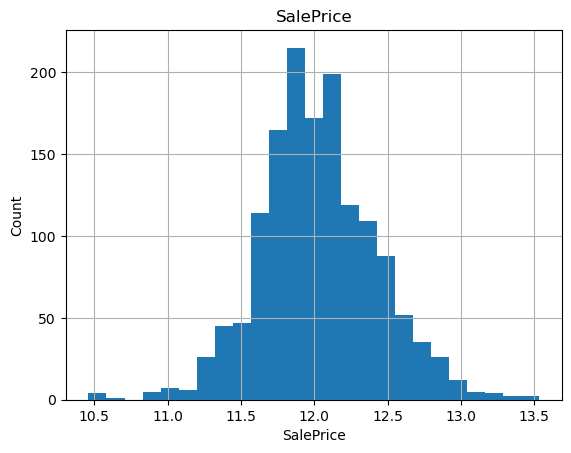

In [108]:
data = dataset.copy()

data['SalePrice'] = np.log(data['SalePrice'])
data['SalePrice'].hist(bins=25)
    
plt.xlabel(feature)
plt.ylabel("Count")
plt.title(feature)
plt.show()


#### Outliers

In [ ]:
## finding out outliers


def plot_log_transformed_scatter(feature, dataset):
    data = dataset.copy()
    
    if 0 not in data[feature].unique():
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

# Creating box plots for each continuous feature with log transformation
for feature in continuous_feature:
    plot_log_transformed_scatter(feature, dataset)

#### Categorical Variables

In [112]:
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtype == 'O']

categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [114]:
dataset[categorical_features].head(5)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


#### Cardinality
Cardinality refers to the number of distinct values in a column or feature of a dataset. High cardinality implies that a column has a large number of unique values, while low cardinality means that a column has a smaller number of unique values.

In [122]:

def print_unique_categories_sorted(dataset, categorical_features):
    # Create a list of tuples containing the feature and the number of unique categories
    feature_num_categories = [(feature, len(dataset[feature].unique())) for feature in categorical_features]

    # Sort the list by the number of unique categories in descending order
    sorted_features = sorted(feature_num_categories, key=lambda x: x[1], reverse=True)

    # Print the sorted list of features and their unique category counts
    for feature, num_categories in sorted_features:
        print(f"The feature {feature} has {num_categories} number of categories")



# Print the number of unique categories for each categorical feature, sorted in descending order
print_unique_categories_sorted(dataset, categorical_features)


The feature Neighborhood has 25 number of categories
The feature Exterior2nd has 16 number of categories
The feature Exterior1st has 15 number of categories
The feature Condition1 has 9 number of categories
The feature SaleType has 9 number of categories
The feature Condition2 has 8 number of categories
The feature HouseStyle has 8 number of categories
The feature RoofMatl has 8 number of categories
The feature BsmtFinType1 has 7 number of categories
The feature BsmtFinType2 has 7 number of categories
The feature Functional has 7 number of categories
The feature GarageType has 7 number of categories
The feature RoofStyle has 6 number of categories
The feature Foundation has 6 number of categories
The feature Heating has 6 number of categories
The feature Electrical has 6 number of categories
The feature FireplaceQu has 6 number of categories
The feature GarageQual has 6 number of categories
The feature GarageCond has 6 number of categories
The feature SaleCondition has 6 number of cate

In [121]:
sorted_features

['PoolQC',
 'MiscFeature',
 'Alley',
 'Fence',
 'FireplaceQu',
 'LotFrontage',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'BsmtExposure',
 'BsmtFinType2',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1',
 'MasVnrType',
 'MasVnrArea']

In [ ]:
# Finding out relationship between categorical variable and dependent feature SalesPrice

for feature in categorical_features:
    data = dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

## 2. Feature Engineering

In [211]:
#data_train_test = dataset.copy()
#data_train_test = data_train_test.drop('SalePrice', axis=1)
#data_train_test = pd.concat([data_train_test, dataset_test], ignore_index = True)
#dataset = data_train_test 

In [286]:
## Let us capture all the nan values
## First lets handle Categorical features which are missing
features_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(dataset[feature].isnull().mean(),4)))

Alley: 0.9377% missing values
MasVnrType: 0.0055% missing values
BsmtQual: 0.0253% missing values
BsmtCond: 0.0253% missing values
BsmtExposure: 0.026% missing values
BsmtFinType1: 0.0253% missing values
BsmtFinType2: 0.026% missing values
FireplaceQu: 0.4726% missing values
GarageType: 0.0555% missing values
GarageFinish: 0.0555% missing values
GarageQual: 0.0555% missing values
GarageCond: 0.0555% missing values
PoolQC: 0.9952% missing values
Fence: 0.8075% missing values
MiscFeature: 0.963% missing values


In [287]:
dataset.shape

(1460, 81)

In [288]:
## Replace missing value with a new label
def replace_cat_feature(dataset,features_nan):
    data=dataset.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

dataset=replace_cat_feature(dataset,features_nan)

dataset[features_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [291]:
## Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(dataset[feature].isnull().mean(),4)))

LotFrontage: 0.1774% missing value
MasVnrArea: 0.0055% missing value
GarageYrBlt: 0.0555% missing value


In [293]:
def replace_num_missing_values(dataset, numerical_with_nan):
    data = dataset.copy()
    
    for feature in numerical_with_nan:
        median_value = data[feature].median()

        # Create a new feature to capture NaN values
        data[feature + 'nan'] = np.where(data[feature].isnull(), 1, 0)
        data[feature].fillna(median_value, inplace=True)
    
    return data

# Assuming you have a test dataset named `test_dataset`
dataset = replace_num_missing_values(dataset, numerical_with_nan)


# Check for missing values in the train and test datasets
print("Train dataset missing values:")
print(dataset[numerical_with_nan].isnull().sum())


Train dataset missing values:
LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64


In [243]:
## Replacing the numerical Missing Values

#for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    #median_value=dataset[feature].median()
    
    ## create a new feature to capture nan values
    #dataset[feature+'nan']=np.where(dataset[feature].isnull(),1,0)
    #dataset[feature].fillna(median_value,inplace=True)
    
#dataset[numerical_with_nan].isnull().sum()
    

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [295]:
dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,Missing,Missing,Missing,0,8,2007,WD,Normal,175000,0,0,0
1456,1457,20,RL,85.0,13175,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,Missing,MnPrv,Missing,0,2,2010,WD,Normal,210000,0,0,0
1457,1458,70,RL,66.0,9042,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,Missing,GdPrv,Shed

In [296]:
def convert_years_to_age(dataset, year_features, sold_year_feature):
    data = dataset.copy()
    
    for feature in year_features:
        data[feature] = data[sold_year_feature] - data[feature]
    
    return data

# List of features to be converted
year_features = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']
sold_year_feature = 'YrSold'


dataset = convert_years_to_age(dataset, year_features, sold_year_feature)


# Check the transformed features in the train dataset
print("Train dataset transformed year features:")
print(dataset[year_features].head())



Train dataset transformed year features:
   YearBuilt  YearRemodAdd  GarageYrBlt
0          5             5          5.0
1         31            31         31.0
2          7             6          7.0
3         91            36          8.0
4          8             8          8.0


In [245]:
#for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    #dataset[feature]=dataset['YrSold']-dataset[feature]

In [246]:
dataset[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


## Numerical Variables

Performing log normal distribution since the numerical variables are skewed 

In [247]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0


In [302]:
num_features = ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

In [299]:
def apply_log_transform(dataset, num_features):
    data = dataset.copy()
    
    for feature in num_features:
        data[feature] = np.log(data[feature])
    
    return data

# List of numerical features to be transformed
num_features = ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']


# Check the transformed features in the train and test datasets
print("Train dataset transformed numerical features:")
print(dataset[num_features].head())



Train dataset transformed numerical features:
   LotFrontage  LotArea  1stFlrSF  GrLivArea  SalePrice
0         65.0     8450       856       1710     208500
1         80.0     9600      1262       1262     181500
2         68.0    11250       920       1786     223500
3         60.0     9550       961       1717     140000
4         84.0    14260      1145       2198     250000


In [269]:
#import numpy as np
#num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

#for feature in num_features:
    #dataset[feature]=np.log(dataset[feature])

### Handling Rare Categorical Feature
Removing categorical variables that are present less than 1% of the observations

In [270]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype=='O']

In [271]:
categorical_features

[]

In [304]:
def apply_categorical_transform(dataset, categorical_features):
    data = dataset.copy()
    
    for feature in categorical_features:
        temp = data.groupby(feature)['Id'].count() / len(data)
        temp_df = temp[temp > 0.01].index
        data[feature] = np.where(data[feature].isin(temp_df), data[feature], 'Rare_var')
    
    return data

# Assuming you have a test dataset named `test_dataset`
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtype == 'O']

dataset = apply_categorical_transform(dataset, categorical_features)


# Check the transformed features in the train and test datasets
print("Train dataset transformed categorical features:")
print(dataset[categorical_features].head())



Train dataset transformed categorical features:
  MSZoning Street    Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave  Missing      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave  Missing      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave  Missing      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave  Missing      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave  Missing      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1     Rare_var      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  Co

In [272]:
#categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype=='O']

#for feature in categorical_features:
    #temp=dataset.groupby(feature)['Id'].count()/len(dataset)
    #temp_df=temp[temp>0.01].index
    #dataset[feature]=np.where(dataset[feature].isin(temp_df),dataset[feature],'Rare_var')
    


In [306]:
for feature in categorical_features:
    counts = dataset[feature].value_counts()

    if 'Rare_var' in counts:
        rl_count = counts['Rare_var']
        print(f"Count of 'Rare_var' in {feature}:", rl_count)
    else:
        print(f"'Rare_var' not found in {feature}")

Count of 'Rare_var' in MSZoning: 10
Count of 'Rare_var' in Street: 6
'Rare_var' not found in Alley
Count of 'Rare_var' in LotShape: 10
'Rare_var' not found in LandContour
Count of 'Rare_var' in Utilities: 1
Count of 'Rare_var' in LotConfig: 4
Count of 'Rare_var' in LandSlope: 13
Count of 'Rare_var' in Neighborhood: 22
Count of 'Rare_var' in Condition1: 26
Count of 'Rare_var' in Condition2: 15
'Rare_var' not found in BldgType
Count of 'Rare_var' in HouseStyle: 33
Count of 'Rare_var' in RoofStyle: 33
Count of 'Rare_var' in RoofMatl: 26
Count of 'Rare_var' in Exterior1st: 7
Count of 'Rare_var' in Exterior2nd: 27
Count of 'Rare_var' in MasVnrType: 8
Count of 'Rare_var' in ExterQual: 14
Count of 'Rare_var' in ExterCond: 4
Count of 'Rare_var' in Foundation: 9
'Rare_var' not found in BsmtQual
Count of 'Rare_var' in BsmtCond: 2
'Rare_var' not found in BsmtExposure
'Rare_var' not found in BsmtFinType1
Count of 'Rare_var' in BsmtFinType2: 14
Count of 'Rare_var' in Heating: 14
Count of 'Rare_var'

In [307]:
dataset.MSZoning.value_counts()

RL          1151
RM           218
FV            65
RH            16
Rare_var      10
Name: MSZoning, dtype: int64

In [ ]:
#def apply_ordinal_encoding(dataset, categorical_features, train_dataset):
    #data = dataset.copy()
    
    #for feature in categorical_features:
        #labels_ordered = train_dataset.groupby([feature])['SalePrice'].mean().sort_values().index
        #labels_ordered = {k: i for i, k in enumerate(labels_ordered, 0)}
        #data[feature] = data[feature].map(labels_ordered)
    
    #return data


#categorical_features = [feature for feature in dataset.columns if dataset[feature].dtype == 'O']

#dataset = apply_ordinal_encoding(dataset, categorical_features, dataset)
#test_dataset = apply_ordinal_encoding(test_dataset, categorical_features, dataset)

# Check the transformed features in the train and test datasets
#print("Train dataset transformed categorical features:")
#print(dataset[categorical_features].head())

#print("\nTest dataset transformed categorical features:")
#print(test_dataset[categorical_features].head())


In [308]:
# Train dataset: Apply ordinal encoding using 'SalePrice' from the train dataset
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtype == 'O']

for feature in categorical_features:
    labels_ordered = dataset.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered = {k: i for i, k in enumerate(labels_ordered, 0)}
    dataset[feature] = dataset[feature].map(labels_ordered)

# Check the transformed features in the train dataset
print("Train dataset transformed categorical features:")
print(dataset[categorical_features].head())


Train dataset transformed categorical features:
   MSZoning  Street  Alley  LotShape  LandContour  Utilities  LotConfig  \
0         3       1      2         0            1          1          0   
1         3       1      2         0            1          1          1   
2         3       1      2         1            1          1          0   
3         3       1      2         1            1          1          2   
4         3       1      2         1            1          1          1   

   LandSlope  Neighborhood  Condition1  Condition2  BldgType  HouseStyle  \
0          0            15           4           1         4           5   
1          0            12           1           1         4           4   
2          0            15           4           1         4           5   
3          0            16           4           1         4           5   
4          0            22           4           1         4           5   

   RoofStyle  RoofMatl  Exterior1st  Exterio

In [275]:
#for feature in categorical_features:
    #labels_ordered=dataset.groupby([feature])['SalePrice'].mean().sort_values().index
    #labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    #dataset[feature]=dataset[feature].map(labels_ordered)

In [276]:
#for feature in categorical_features:
    # Calculate the frequency of each category in the feature
    #category_frequencies = dataset[feature].value_counts(normalize=True)
    
    # Create a dictionary mapping the category labels to their frequencies
    #labels_ordered = category_frequencies.to_dict()
    
    # Replace the original categorical feature values with their corresponding frequencies
    #dataset[feature] = dataset[feature].map(labels_ordered)

In [277]:
dataset.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,3,1.428968,2.201872,1,2,0,1,1,0,0,15,4,1,4,5,7,5,5,5,0,0,9,9,2,196.0,2,3,4,3,3,1,6,706,5,0,150,856,2,4,1,3,1.909879,854,0,2.007442,1,0,2,1,3,1,2,8,4,0,1,4,5.0,2,2,548,2,3,2,0,61,0,0,0,0,0,4,2,0,2,2008,2,3,12.247694,0,0,0
1,2,20,3,1.477511,2.215885,1,2,0,1,1,1,0,12,1,1,4,4,6,8,31,31,0,0,1,2,1,0.0,1,3,2,3,3,4,4,978,5,0,284,1262,2,4,1,3,1.965776,0,0,1.965776,0,1,2,0,3,1,1,6,4,1,3,4,31.0,2,2,460,2,3,2,298,0,0,0,0,0,0,4,2,0,5,2007,2,3,12.109011,0,0,0
2,3,60,3,1.439718,2.233034,1,2,1,1,1,0,0,15,4,1,4,5,7,5,7,6,0,0,9,9,2,162.0,2,3,4,3,3,2,6,486,5,0,434,920,2,4,1,3,1.920501,866,0,2.013266,1,0,2,1,3,1,2,6,4,1,3,4,7.0,2,2,608,2,3,2,0,42,0,0,0,0,0,4,2,0,9,2008,2,3,12.317167,0,0,0
3,4,70,3,1.409607,2.215315,1,2,1,1,1,2,0,16,4,1,4,5,7,5,91,36,0,0,2,4,1,0.0,1,3,1,2,4,1,4,216,5,0,540,756,2,3,1,3,1.926869,756,0,2.007990,1,0,1,0,3,1,2,7,4,1,4,2,8.0,1,3,642,2,3,2,0,35,272,0,0,0,0,4,2,0,2,2006,2,0,11.849398,0,0,0
4,5,60,3,1.488584,2.258133,1,2,1,1,1,1,0,22,4,1,4,5,8,5,8,8,0,0,9,9,2,350.0,2,3,4,3,3,3,6,655,5,0,490,1145,2,4,1,3,1.952057,1053,0,2.040610,1,0,2,1,4,1,2,9,4,1,3,4,8.0,2,3,836,2,3,2,192,84,0,0,0,0,0,4,2,0,12,2008,2,3,12.429216,0,0,0
5,6,50,3,1.491251,2.257064,1,2,1,1,1,0,0,9,4,1,4,1,5,5,16,14,0,0,9,9,1,0.0,1,3,3,3,3,1,6,732,5,0,64,796,2,4,1,3,1.899058,566,0,1.976399,1,0,1,1,1,1,1,5,4,0,1,4,16.0,1,2,480,2,3,2,40,30,0,320,0,0,0,2,0,700,10,2009,2,3,11.870600,0,0,0
6,7,20,3,1.462674,2.221235,1,2,0,1,1,0,0,18,4,1,4,4,8,5,3,2,0,0,9,9,4,186.0,2,3,4,4,3,3,6,1369,5,0,317,1686,2,4,1,3,2.006178,0,0,2.006178,1,0,2,0,3,1,2,7,4,1,4,4,3.0,2,2,636,2,3,2,255,57,0,0,0,0,0,4,2,0,8,2007,2,3,12.634603,0,0,0
7,8,60,3,1.443172,2.224389,1,2,1,1,1,2,0,11,5,1,4,5,7,6,36,36,0,0,6,5,4,240.0,1,3,2,3,3,2,4,859,1,32,216,1107,2,4,1,3,1.947253,983,0,2.034041,1,0,2,1,3,1,1,7,4,2,3,4,36.0,2,2,484,2,3,2,235,204,228,0,0,0,0,4,0,350,11,2009,2,3,12.206073,1,0,0
8,9,50,1,1.369104,2.165541,1,2,0,1,1,0,0,5,0,1,4,1,7,5,77,58,0,0,8,4,1,0.0,1,3,1,2,3,1,5,0,5,0,952,952,2,3,1,1,1.935790,752,0,2.012365,0,0,2,0,2,2,1,8,2,2,3,2,77.0,1,2,468,1,3,2,90,0,205,0,0,0,0,4,2,0,4,2008,2,0,11.774520,0,0,0
9,10,190,3,1.364055,2.187391,1,2,0,1,1,2,0,3,0,0,0,2,5,6,69,58,0,0,1,2,1,0.0,1,3,1,2,3,1,6,851,5,0,140,991,2,4,1,3,1.943326,0,0,1.943326,1,0,1,0,2,2,1,5,4,2,3,4,69.0,2,1,205,3,3,2,0,4,0,0,0,0,0,4,2,0,1,2008,2,3,11.678440,0,0,0


In [278]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,3,1.428968,2.201872,1,2,0,1,1,0,0,15,4,1,4,5,7,5,5,5,0,0,9,9,2,196.0,2,3,4,3,3,1,6,706,5,0,150,856,2,4,1,3,1.909879,854,0,2.007442,1,0,2,1,3,1,2,8,4,0,1,4,5.0,2,2,548,2,3,2,0,61,0,0,0,0,0,4,2,0,2,2008,2,3,12.247694,0,0,0
1,2,20,3,1.477511,2.215885,1,2,0,1,1,1,0,12,1,1,4,4,6,8,31,31,0,0,1,2,1,0.0,1,3,2,3,3,4,4,978,5,0,284,1262,2,4,1,3,1.965776,0,0,1.965776,0,1,2,0,3,1,1,6,4,1,3,4,31.0,2,2,460,2,3,2,298,0,0,0,0,0,0,4,2,0,5,2007,2,3,12.109011,0,0,0
2,3,60,3,1.439718,2.233034,1,2,1,1,1,0,0,15,4,1,4,5,7,5,7,6,0,0,9,9,2,162.0,2,3,4,3,3,2,6,486,5,0,434,920,2,4,1,3,1.920501,866,0,2.013266,1,0,2,1,3,1,2,6,4,1,3,4,7.0,2,2,608,2,3,2,0,42,0,0,0,0,0,4,2,0,9,2008,2,3,12.317167,0,0,0
3,4,70,3,1.409607,2.215315,1,2,1,1,1,2,0,16,4,1,4,5,7,5,91,36,0,0,2,4,1,0.0,1,3,1,2,4,1,4,216,5,0,540,756,2,3,1,3,1.926869,756,0,2.007990,1,0,1,0,3,1,2,7,4,1,4,2,8.0,1,3,642,2,3,2,0,35,272,0,0,0,0,4,2,0,2,2006,2,0,11.849398,0,0,0
4,5,60,3,1.488584,2.258133,1,2,1,1,1,1,0,22,4,1,4,5,8,5,8,8,0,0,9,9,2,350.0,2,3,4,3,3,3,6,655,5,0,490,1145,2,4,1,3,1.952057,1053,0,2.040610,1,0,2,1,4,1,2,9,4,1,3,4,8.0,2,3,836,2,3,2,192,84,0,0,0,0,0,4,2,0,12,2008,2,3,12.429216,0,0,0


### Feature Scaling

In [279]:
feature_scale=[feature for feature in dataset.columns if feature not in ['Id','SalePrice']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dataset[feature_scale])

MinMaxScaler()

In [280]:
scaler.transform(dataset[feature_scale])

array([[0.23529412, 0.75      , 0.49689213, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.57331546, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.75      , 0.51381745, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.29411765, 0.75      , 0.50263957, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.51381745, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.54995643, ..., 0.        , 0.        ,
        0.        ]])

In [281]:
# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([dataset[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(dataset[feature_scale]), columns=feature_scale)],
                    axis=1)

In [282]:
data.shape

(1460, 84)

In [283]:
data.to_csv('X_train.csv',index=False)

In [284]:
data.Neighborhood.value_counts()

0.363636    225
0.681818    150
0.227273    113
0.181818    100
0.818182     86
0.590909     79
0.954545     77
0.272727     74
0.500000     73
0.454545     59
0.136364     58
0.727273     51
0.409091     49
1.000000     41
0.863636     38
0.045455     37
0.772727     28
0.909091     25
0.318182     25
0.545455     22
0.000000     17
0.636364     17
0.090909     16
Name: Neighborhood, dtype: int64

## Preparing test data for Kaggle Competition

In [289]:
dataset_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

In [290]:

dataset_test = replace_cat_feature(dataset_test, features_nan)

# Check for missing values in the test dataset
print(dataset_test[features_nan].isnull().sum())

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64


In [294]:
dataset_test = replace_num_missing_values(dataset_test, numerical_with_nan)

# Check for missing values in the test dataset


print("Test dataset missing values:")
print(dataset_test[numerical_with_nan].isnull().sum())

Test dataset missing values:
LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64


In [298]:

dataset_test = convert_years_to_age(dataset_test, year_features, sold_year_feature)



print("Test dataset transformed year features:")
print(dataset_test[year_features].head())

Test dataset transformed year features:
   YearBuilt  YearRemodAdd  GarageYrBlt
0         49            49         49.0
1         52            52         52.0
2         13            12         13.0
3         12            12         12.0
4         18            18         18.0


In [303]:

num_features.remove('SalePrice')
dataset_test = apply_log_transform(dataset_test, num_features)



print("Test dataset transformed numerical features:")
print(dataset_test[num_features].head())

Test dataset transformed numerical features:
   LotFrontage   LotArea  1stFlrSF  GrLivArea
0     4.382027  9.360655  6.797940   6.797940
1     4.394449  9.565704  7.192182   7.192182
2     4.304065  9.534595  6.833032   7.395722
3     4.356709  9.208138  6.830874   7.380256
4     3.761200  8.518193  7.154615   7.154615


In [305]:

dataset_test = apply_categorical_transform(dataset_test, categorical_features)

# Check the transformed features in the test dataset


print("Test dataset transformed categorical features:")
print(dataset_test[categorical_features].head())

Test dataset transformed categorical features:
   MSZoning Street    Alley LotShape LandContour Utilities LotConfig  \
0  Rare_var   Pave  Missing      Reg         Lvl    AllPub    Inside   
1        RL   Pave  Missing      IR1         Lvl    AllPub    Corner   
2        RL   Pave  Missing      IR1         Lvl    AllPub    Inside   
3        RL   Pave  Missing      IR1         Lvl    AllPub    Inside   
4        RL   Pave  Missing      IR1         HLS    AllPub    Inside   

  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
0       Gtl        NAmes      Feedr       Norm     1Fam     1Story     Gable   
1       Gtl        NAmes       Norm       Norm     1Fam     1Story       Hip   
2       Gtl      Gilbert       Norm       Norm     1Fam     2Story     Gable   
3       Gtl      Gilbert       Norm       Norm     1Fam     2Story     Gable   
4       Gtl      StoneBr       Norm       Norm   TwnhsE     1Story     Gable   

  RoofMatl Exterior1st Exterior2nd MasV

In [309]:
# Test dataset: Apply ordinal encoding using 'SalePrice' from the train dataset
categorical_features = [feature for feature in dataset_test.columns if dataset_test[feature].dtype == 'O']

for feature in categorical_features:
    labels_ordered = dataset.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered = {k: i for i, k in enumerate(labels_ordered, 0)}
    dataset_test[feature] = dataset_test[feature].map(labels_ordered)

# Check the transformed features in the test dataset
print("Test dataset transformed categorical features:")
print(dataset_test[categorical_features].head())

Test dataset transformed categorical features:
   MSZoning  Street  Alley  LotShape  LandContour  Utilities  LotConfig  \
0       NaN     NaN    NaN       NaN          NaN        NaN        NaN   
1       NaN     NaN    NaN       NaN          NaN        NaN        NaN   
2       NaN     NaN    NaN       NaN          NaN        NaN        NaN   
3       NaN     NaN    NaN       NaN          NaN        NaN        NaN   
4       NaN     NaN    NaN       NaN          NaN        NaN        NaN   

   LandSlope  Neighborhood  Condition1  Condition2  BldgType  HouseStyle  \
0        NaN           NaN         NaN         NaN       NaN         NaN   
1        NaN           NaN         NaN         NaN       NaN         NaN   
2        NaN           NaN         NaN         NaN       NaN         NaN   
3        NaN           NaN         NaN         NaN       NaN         NaN   
4        NaN           NaN         NaN         NaN       NaN         NaN   

   RoofStyle  RoofMatl  Exterior1st  Exterior